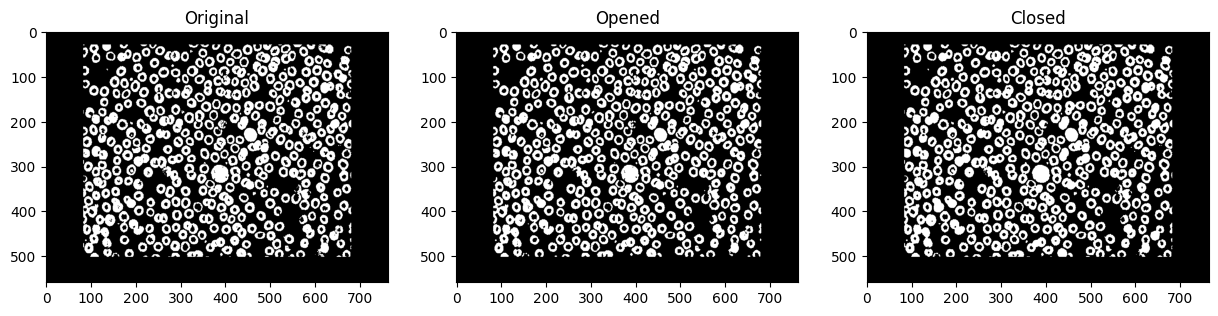

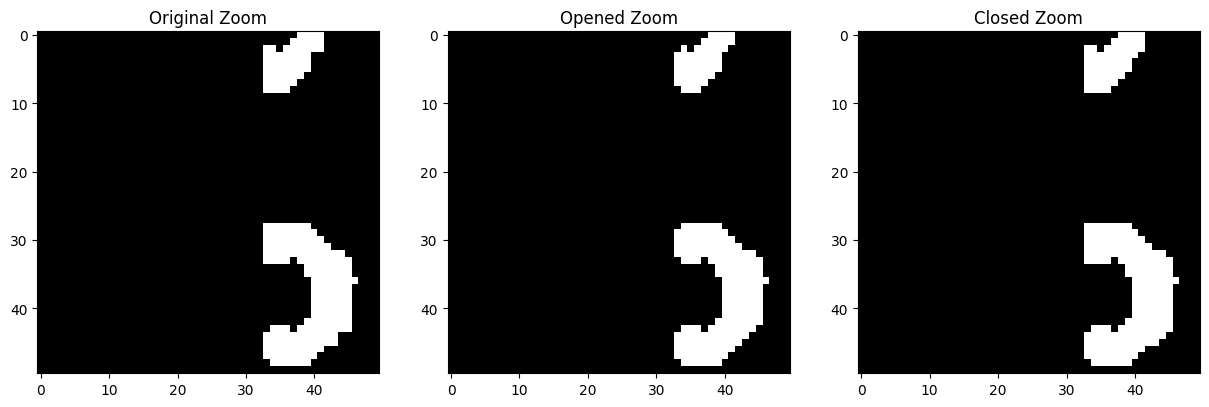

In [2]:
import matplotlib.pyplot as plt
from skimage import io, morphology
from skimage.measure import label

image = io.imread('../TestImages/Week 7/cells_binary_inv.png', as_gray=True)
binary = image > 0.5  

selem = morphology.disk(1)

opened = morphology.opening(binary, selem)
closed = morphology.closing(binary, selem)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(opened, cmap='gray')
axes[1].set_title('Opened')
axes[2].imshow(closed, cmap='gray')
axes[2].set_title('Closed')

y, x, h, w = 50, 50, 50, 50
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary[y:y+h, x:x+w], cmap='gray')
axes[0].set_title('Original Zoom')
axes[1].imshow(opened[y:y+h, x:x+w], cmap='gray')
axes[1].set_title('Opened Zoom')
axes[2].imshow(closed[y:y+h, x:x+w], cmap='gray')
axes[2].set_title('Closed Zoom')
plt.show()

Opened labels: 369
Closed labels: 343


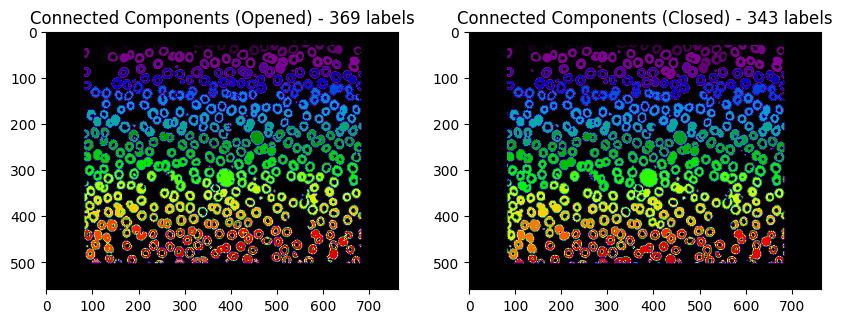

In [3]:
# 4.1.3 
# Label connected components
labels_open = label(opened, connectivity=2)
labels_close = label(closed, connectivity=2)

print(f"Opened labels: {labels_open.max()}") # num_opened
print(f"Closed labels: {labels_close.max()}") # num_closed

# Visualize labels
plt.figure(figsize=(10,5))
plt.subplot(121).imshow(labels_open, cmap='nipy_spectral')
plt.title(f'Connected Components (Opened) - {labels_open.max()} labels')
plt.subplot(122).imshow(labels_close, cmap='nipy_spectral')
plt.title(f'Connected Components (Closed) - {labels_close.max()} labels')
plt.show()


In [3]:
from skimage import io, morphology, measure

money = io.imread('../TestImages/Week 7/money_bin.png', as_gray=True) > 0.5

# Clean image
selem = morphology.disk(5)
closed = morphology.closing(money, selem)

# Label components
labels = measure.label(closed, connectivity=2)
count = labels.max()  # Assuming each label is a coin

# Assign values based on size (hypothetical example)
# Assuming areas correspond to coin denominations
props = measure.regionprops_table(labels, properties=['area'])
total = sum(20 if a > 1000 else 10 if a > 500 else 5 for a in props['area'])
print(f"Total: {total} kr")

Total: 45 kr


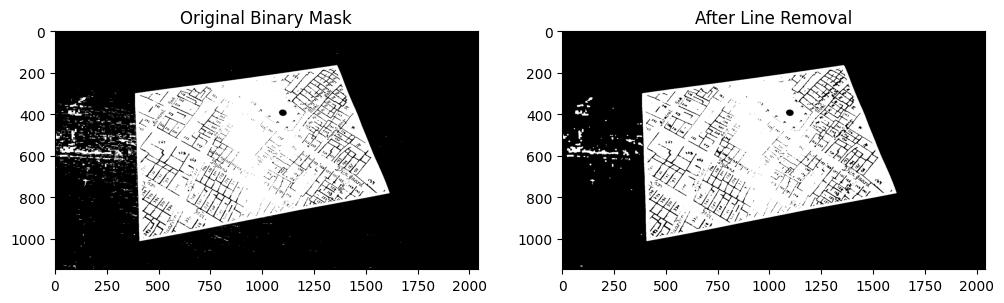

/var/folders/p_/0gcgc4yd7m3gt8g3k9p3kvv80000gn/T/ipykernel_6866/1069509605.py:25: UserWarning: cleaned_binary_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('cleaned_binary_mask.png', cleaned)


In [5]:
from skimage import io, morphology
import matplotlib.pyplot as plt

# 1. Load the binary segmentation image
# (Assuming black lines = 0, white background = 1)
binary_mask = io.imread('../TestImages/Week 7/matrikelnumre_nat.png', as_gray=True)

# 2. Ensure proper binarization (adjust threshold if needed)
binary_mask = binary_mask > 0.5  # Example threshold - verify with your image

# 3. Remove thin black lines using morphological opening
# (Erosion removes thin black lines, dilation restores shape)
selem = morphology.disk(radius=2)  # Adjust radius based on line thickness
cleaned = morphology.opening(binary_mask, selem)

# 4. Visualize results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(binary_mask, cmap='gray')
ax[0].set_title('Original Binary Mask')
ax[1].imshow(cleaned, cmap='gray')
ax[1].set_title('After Line Removal')
plt.show()

# 5. Save cleaned mask
io.imsave('cleaned_binary_mask.png', cleaned)